[*********************100%***********************]  1 of 1 completed


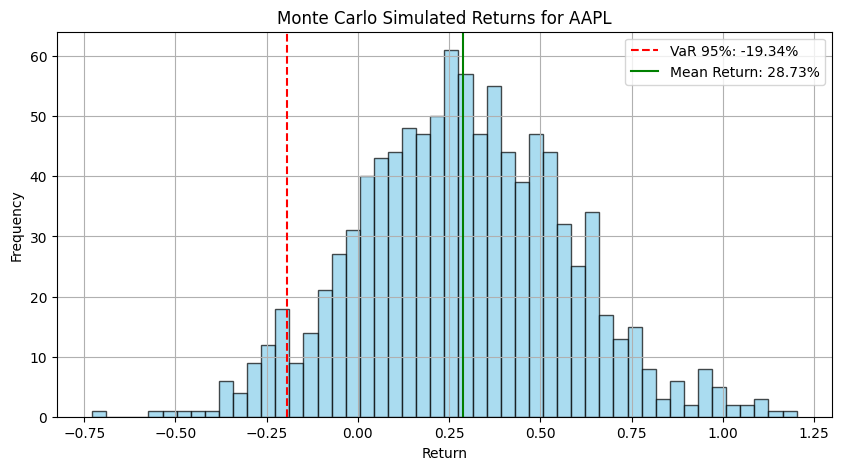

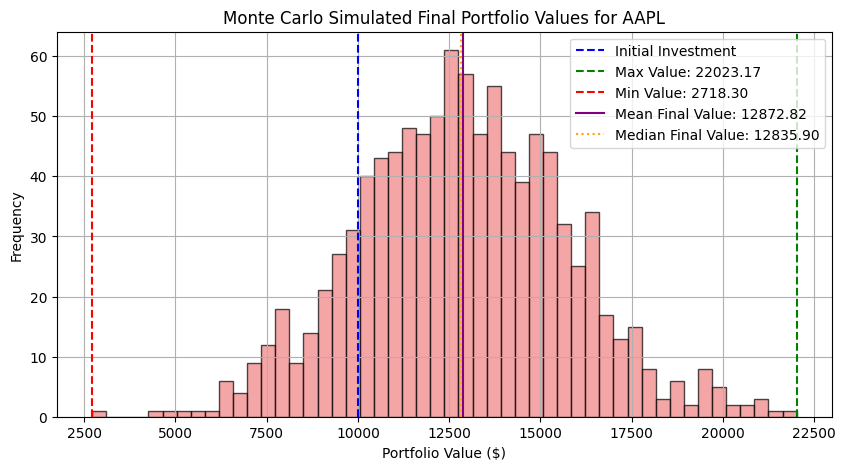

Monte Carlo Simülasyon Sonuçları:
Ortalama Simüle Edilmiş Getiri: 28.73%
Getirinin Standart Sapması: 28.64%
%95 Güvence Düzeyinde Değer Riski (VaR): -19.34%
Zarar Olasılığı: 15.40%
En İyi Performans (Maksimum Değer): 22023.17 $
En Kötü Performans (Minimum Değer): 2718.30 $
En Yüksek Getiri: 120.23%
En Düşük Getiri: -72.82%
Ortalama Final Değeri: 12872.82 $
Medyan Final Değeri: 12835.90 $


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

symbol = "AAPL"  
data = yf.download(symbol, start="2020-01-01", end="2025-01-01", interval="1mo")  

data['Monthly Return'] = data['Adj Close'].pct_change()
mean_return = data['Monthly Return'].mean() * 12  
std_dev = data['Monthly Return'].std() * np.sqrt(12)  

n_simulations = 1000  
initial_investment = 10000  

def simulate_portfolio(n_simulations, initial_investment, mean_return, std_dev):

    simulated_returns = np.random.normal(mean_return, std_dev, n_simulations)

    final_values = initial_investment * (1 + simulated_returns)

    return simulated_returns, final_values

simulated_returns, final_values = simulate_portfolio(n_simulations, initial_investment, mean_return, std_dev)

mean_simulated_return = np.mean(simulated_returns)
std_simulated_return = np.std(simulated_returns)
value_at_risk_95 = np.percentile(simulated_returns, 5)  
loss_probability = np.mean(simulated_returns < 0)  

mean_final_value = np.mean(final_values)  
median_final_value = np.median(final_values)  

max_value = np.max(final_values)  
min_value = np.min(final_values)  

max_return = np.max(simulated_returns)  
min_return = np.min(simulated_returns)  

plt.figure(figsize=(10, 5))
plt.hist(simulated_returns, bins=50, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(value_at_risk_95, color="red", linestyle="dashed", label=f"VaR 95%: {value_at_risk_95:.2%}")
plt.axvline(mean_simulated_return, color="green", linestyle="solid", label=f"Mean Return: {mean_simulated_return:.2%}")
plt.title(f"Monte Carlo Simulated Returns for {symbol}")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(final_values, bins=50, color="lightcoral", edgecolor="black", alpha=0.7)
plt.axvline(initial_investment, color="blue", linestyle="dashed", label="Initial Investment")
plt.axvline(max_value, color="green", linestyle="dashed", label=f"Max Value: {max_value:.2f}")
plt.axvline(min_value, color="red", linestyle="dashed", label=f"Min Value: {min_value:.2f}")
plt.axvline(mean_final_value, color="purple", linestyle="solid", label=f"Mean Final Value: {mean_final_value:.2f}")
plt.axvline(median_final_value, color="orange", linestyle="dotted", label=f"Median Final Value: {median_final_value:.2f}")
plt.title(f"Monte Carlo Simulated Final Portfolio Values for {symbol}")
plt.xlabel("Portfolio Value ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print("Monte Carlo Simülasyon Sonuçları:")
print(f"Ortalama Simüle Edilmiş Getiri: {mean_simulated_return:.2%}")
print(f"Getirinin Standart Sapması: {std_simulated_return:.2%}")
print(f"%95 Güvence Düzeyinde Değer Riski (VaR): {value_at_risk_95:.2%}")
print(f"Zarar Olasılığı: {loss_probability:.2%}")
print(f"En İyi Performans (Maksimum Değer): {max_value:.2f} $")
print(f"En Kötü Performans (Minimum Değer): {min_value:.2f} $")
print(f"En Yüksek Getiri: {max_return:.2%}")
print(f"En Düşük Getiri: {min_return:.2%}")
print(f"Ortalama Final Değeri: {mean_final_value:.2f} $")
print(f"Medyan Final Değeri: {median_final_value:.2f} $")